In [1]:
ls

Appro_k_fisher_noreg.npy    new_predictions.npy
CG_method.ipynb             old_predictions.npy
CSV_SST_bertlin_alg1.csv    test_feature_save.npy
CSV_SST_bertlin_alg1.ipynb  test_label_save.npy
Smallest_k.ipynb            train_feature_save.npy
Use_approK.ipynb            train_label_save.npy
appro_ks_IP.npy


In [1]:
import numpy as np
import matplotlib.pyplot as plt
new_pred_k = np.load("new_predictions.npy",  allow_pickle=True)
app_k = np.load("appro_ks_IP.npy", allow_pickle=True)
#exact_ks = np.load("exact_ks_IP.npy", allow_pickle=True)
pred = np.load("old_predictions.npy", allow_pickle=True)
np.sum([new_pred_k[i] != None for i in range(new_pred_k.shape[0])])

688

In [2]:
np.mean([i for i in app_k if i != None])

483.64098837209303

In [3]:
valid_new_pred_k = [new_pred_k[i] for i in range(new_pred_k.shape[0]) if new_pred_k[i] != None]

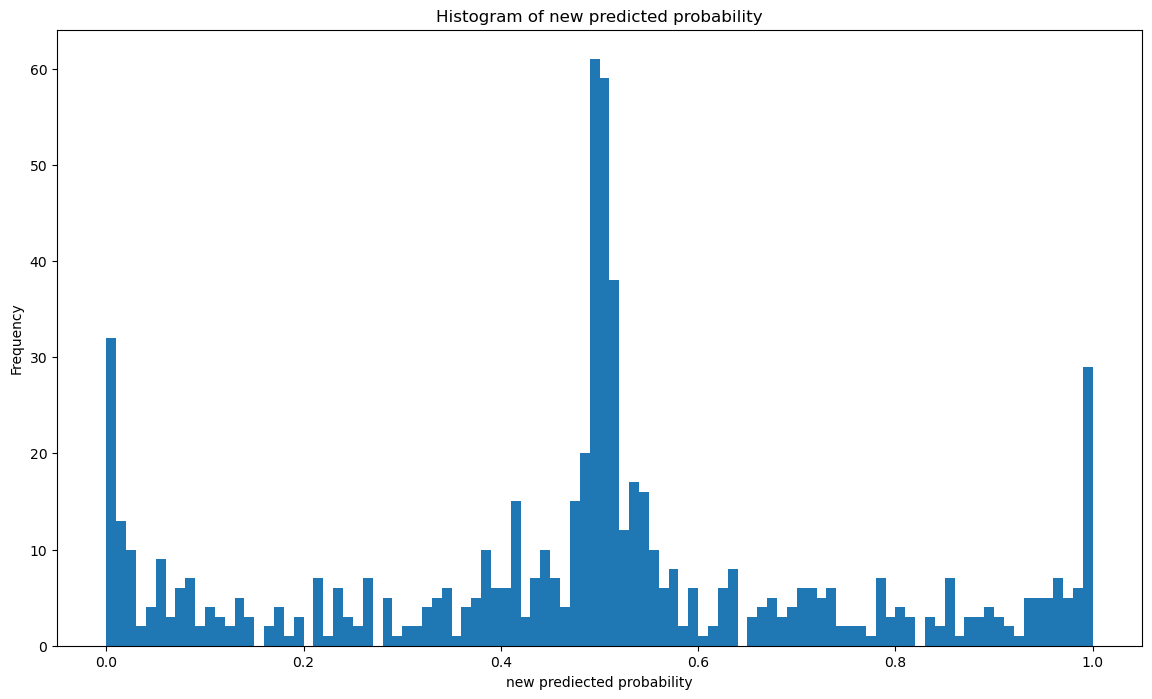

In [4]:
plt.figure(figsize=(14, 8))
n, bins, patches=plt.hist(valid_new_pred_k, bins=100)
plt.xlabel("new prediected probability")
plt.ylabel("Frequency")
plt.title("Histogram of new predicted probability")
plt.show()

# How many of them is None

In [6]:
np.sum([app_k[i] == None for i in range(872)])

184

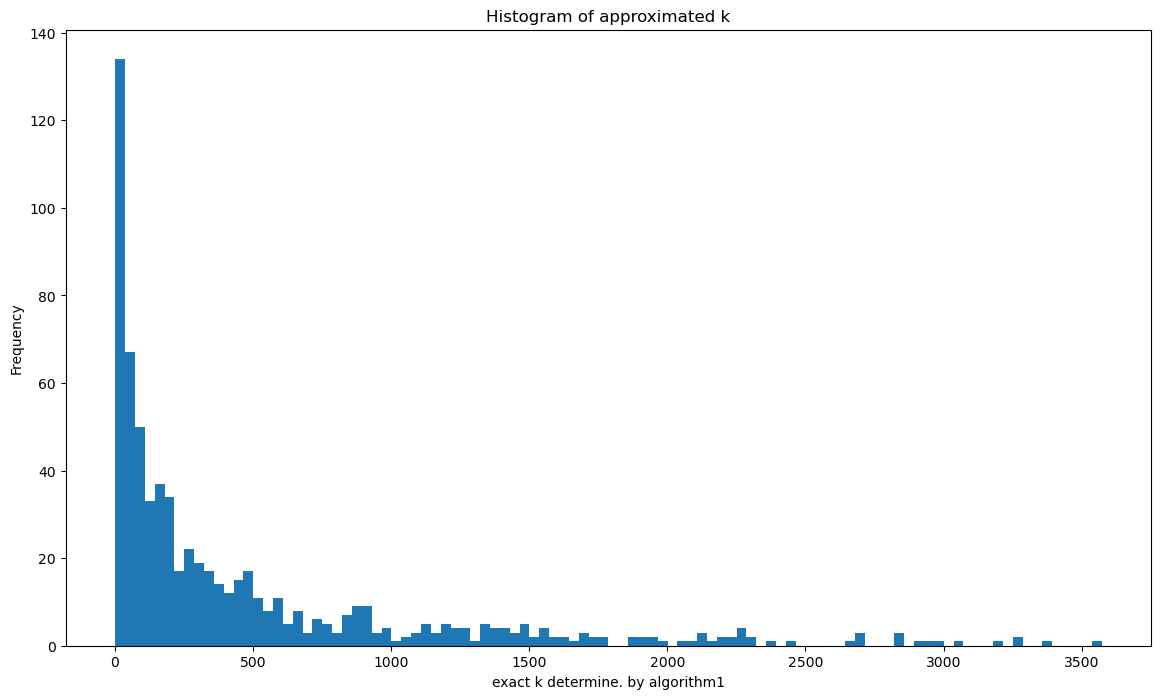

In [7]:
app_k_nonon=[app_k[i] for i in range(872) if app_k[i] != None]

plt.figure(figsize=(14, 8))
n, bins, patches=plt.hist(app_k_nonon, bins=100)
plt.xlabel("exact k determine. by algorithm1")
plt.ylabel("Frequency")
plt.title("Histogram of approximated k")
plt.show()

# For those are not None, how is the flip

In [9]:
flips = np.zeros((872, 1))
diff = np.zeros((872, 1))

#1: flip the label, 0: not flip the label, 2: cannot found k
for i in range(872):
    if app_k[i] != None:
        if np.round(pred[i].item()) != np.round(new_pred_k[i].item()):
            flips[i, :] = 1
        else:
            flips[i, :] = 0  
            
        diff[i] = new_pred_k[i] - 0.5
        
        print("old", pred[i].item())
        print("new", new_pred_k[i].item())
        print("appro k", app_k[i])
        print("flip label", flips[i, :])
        print()
        
    else:
        flips[i, :] = 2
        #print("appro k", app_k[i])

old 0.33874596114335925
new 0.5359762021989736
appro k 88
flip label [1.]

old 0.8284673373431652
new 0.1861630596176299
appro k 356
flip label [1.]

old 0.8608074016192042
new 0.09225215527278538
appro k 545
flip label [1.]

old 0.5573773191929565
new 0.4801756644666441
appro k 24
flip label [1.]

old 0.47132502840810114
new 0.4991310064379085
appro k 8
flip label [0.]

old 0.9089347438066567
new 0.00022880578783090837
appro k 3572
flip label [1.]

old 0.8899647651761162
new 0.01406597208516668
appro k 1477
flip label [1.]

old 0.5648101946855747
new 0.49867022556361035
appro k 14
flip label [1.]

old 0.6463662750212086
new 0.4638521386813738
appro k 89
flip label [1.]

old 0.7206865379715773
new 0.41910800940883136
appro k 157
flip label [1.]

old 0.7958812459716181
new 0.26739015372774244
appro k 436
flip label [1.]

old 0.5224076590384208
new 0.50160990700268
appro k 10
flip label [0.]

old 0.7217621862966026
new 0.4112494575016867
appro k 157
flip label [1.]

old 0.864857007474212

In [10]:
# flip the label
num_flip = np.sum([flips[i] == 1 for i in range(872)])
num_flip

665

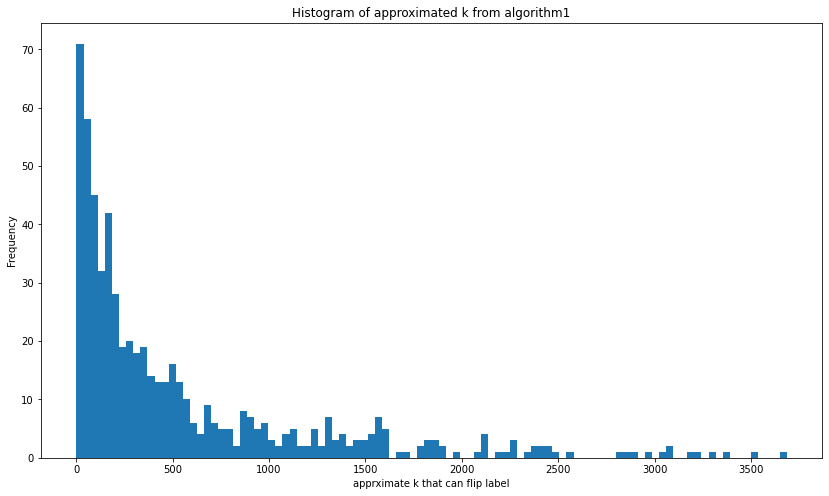

In [11]:

flip_idx = [i for i in range(872) if flips[i] == 1 ]
K_flip = app_k[flip_idx]
# Plot exact k distribution
plt.figure(figsize=(14, 8))
n, bins, patches=plt.hist(K_flip, bins=100)
plt.xlabel("apprximate k that can flip label")
plt.ylabel("Frequency")
plt.title("Histogram of approximated k from algorithm1")
plt.show()

In [12]:
# not flip the label
num_noflip = np.sum([flips[i] == 0 for i in range(872)])
num_noflip

82

In [13]:
num_nok = np.sum([flips[i] == 2 for i in range(872)])
num_nok

188

In [14]:
# diff for those flip the lable
diff1=[diff[i] for i in range(872) if flips[i] == 1]
np.mean(np.abs(diff1)), np.var(np.abs(diff1))

(0.33532786156777006, 0.027569588608099035)

In [15]:
# diff for those cannot flip the lable
diff0=[diff[i] for i in range(872) if flips[i] == 0]
np.mean(np.abs(diff0)), np.var(np.abs(diff0))

(0.07457511486777313, 0.003832486421044156)

In [16]:
index0 = [i for i in range(872) if flips[i] == 0]

# not always underestimate?

# exact k is smaller

# order list

In [3]:
pwd

'/Users/eciel/Desktop/y3s2_sum/orf/summer/privacy_methods/LR/IF/Logistic_SST/IF_lr_fix'